# decision_tree_classifier.py

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset

In [18]:
df = pd.read_excel("heart_disease.xlsx", sheet_name='Heart_disease')

# EDA

In [19]:
print("Dataset Head:\n", df.head())
print("\nData Info:\n")
df.info()
print("\nMissing values:\n", df.isnull().sum())

Dataset Head:
    age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  ----

# Replace incorrect values in 'exang' column

In [20]:
df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False})

/tmp/ipython-input-20-494141445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False})


# Encode categorical columns

In [21]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert boolean columns to integer type

In [22]:
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

# Split features and target

In [23]:
X = df.drop('num', axis=1) # Corrected target column name to 'num'
y = df['num']

# Print unique values in y to verify classes

In [24]:
print("\nUnique values in target variable y:", y.unique())


Unique values in target variable y: [0 1 2 3 4]


# Train-test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Predictions and evaluation

In [27]:
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71        89
           1       0.41      0.42      0.41        48
           2       0.26      0.27      0.27        22
           3       0.19      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.31      0.31      0.31       182
weighted avg       0.51      0.51      0.51       182

Accuracy Score: 0.5054945054945055
Confusion Matrix:
 [[63 15  6  3  2]
 [16 20  7  5  0]
 [ 6  3  6  5  2]
 [ 3  8  1  3  2]
 [ 0  3  3  0  0]]


# Hyperparameter tuning

In [28]:
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)
print("\nBest Parameters:", grid.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}


# Final model

In [29]:
best_clf = grid.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_best))


Tuned Model Accuracy: 0.5769230769230769


# Plotting the Decision Tree

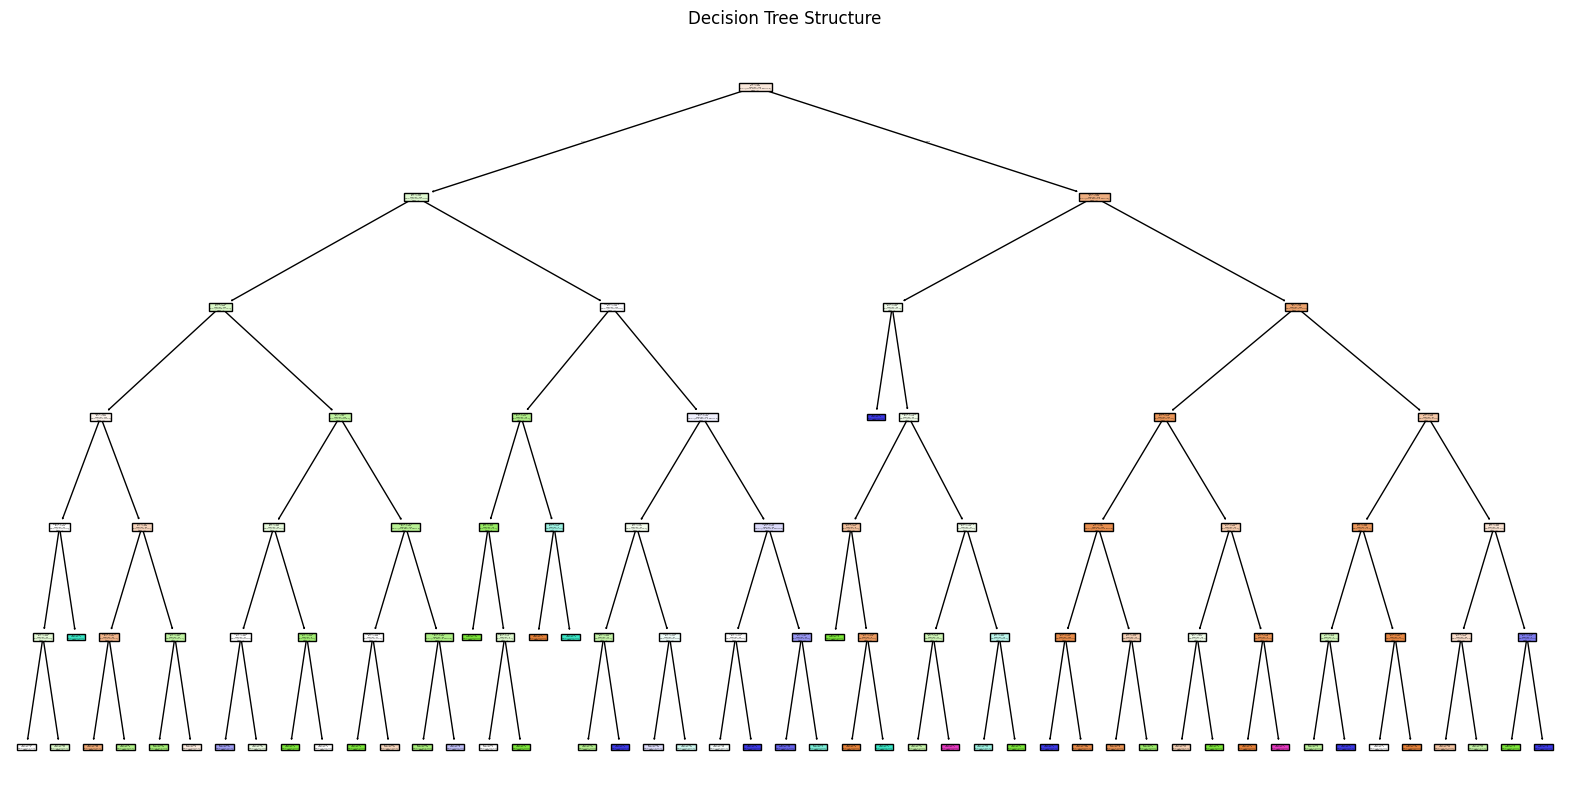

In [30]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=[str(cls) for cls in sorted(y.unique())], filled=True)
plt.title("Decision Tree Structure")
plt.show()

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

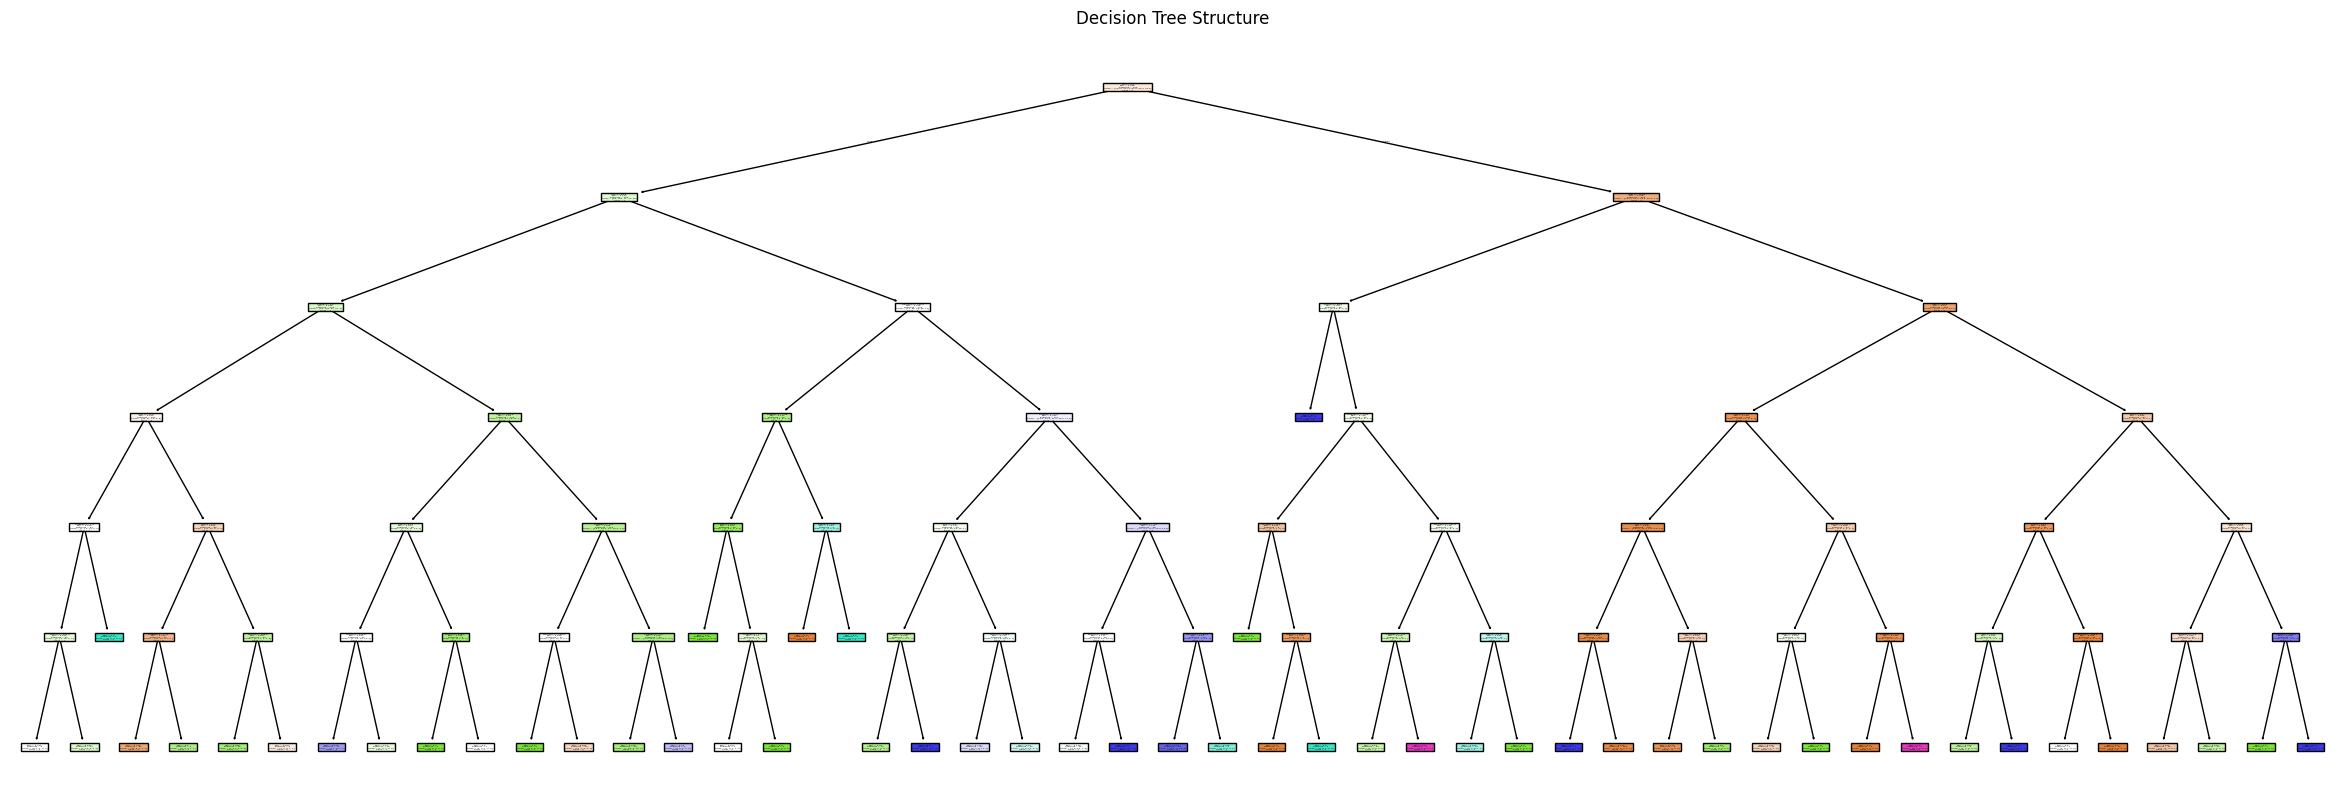

In [33]:
plt.figure(figsize=(30, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=[str(cls) for cls in sorted(y.unique())],filled=True)
plt.title("Decision Tree Structure")
plt.show()

# --- Interview Questions ---

In [34]:
# 1. What are some common hyperparameters of decision tree models?

# - max_depth: Maximum depth of the tree; prevents overfitting.
# - min_samples_split: Minimum samples required to split; higher value reduces overfitting.
# - min_samples_leaf: Minimum samples at a leaf node.
# - max_features: Number of features to consider at each split.
# - criterion: Splitting method ('gini', 'entropy').

In [35]:
# 2. What is the difference between Label encoding and One-hot encoding?

# Label Encoding:
# - Converts categories into integers.
# - Suitable for ordinal data.
# - Example: Red=0, Green=1

# One-Hot Encoding:
# - Converts each category into a binary vector.
# - Suitable for nominal data.
# - Example: Red = [1,0,0], Green = [0,1,0]

### 📊 Decision Tree Structure

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

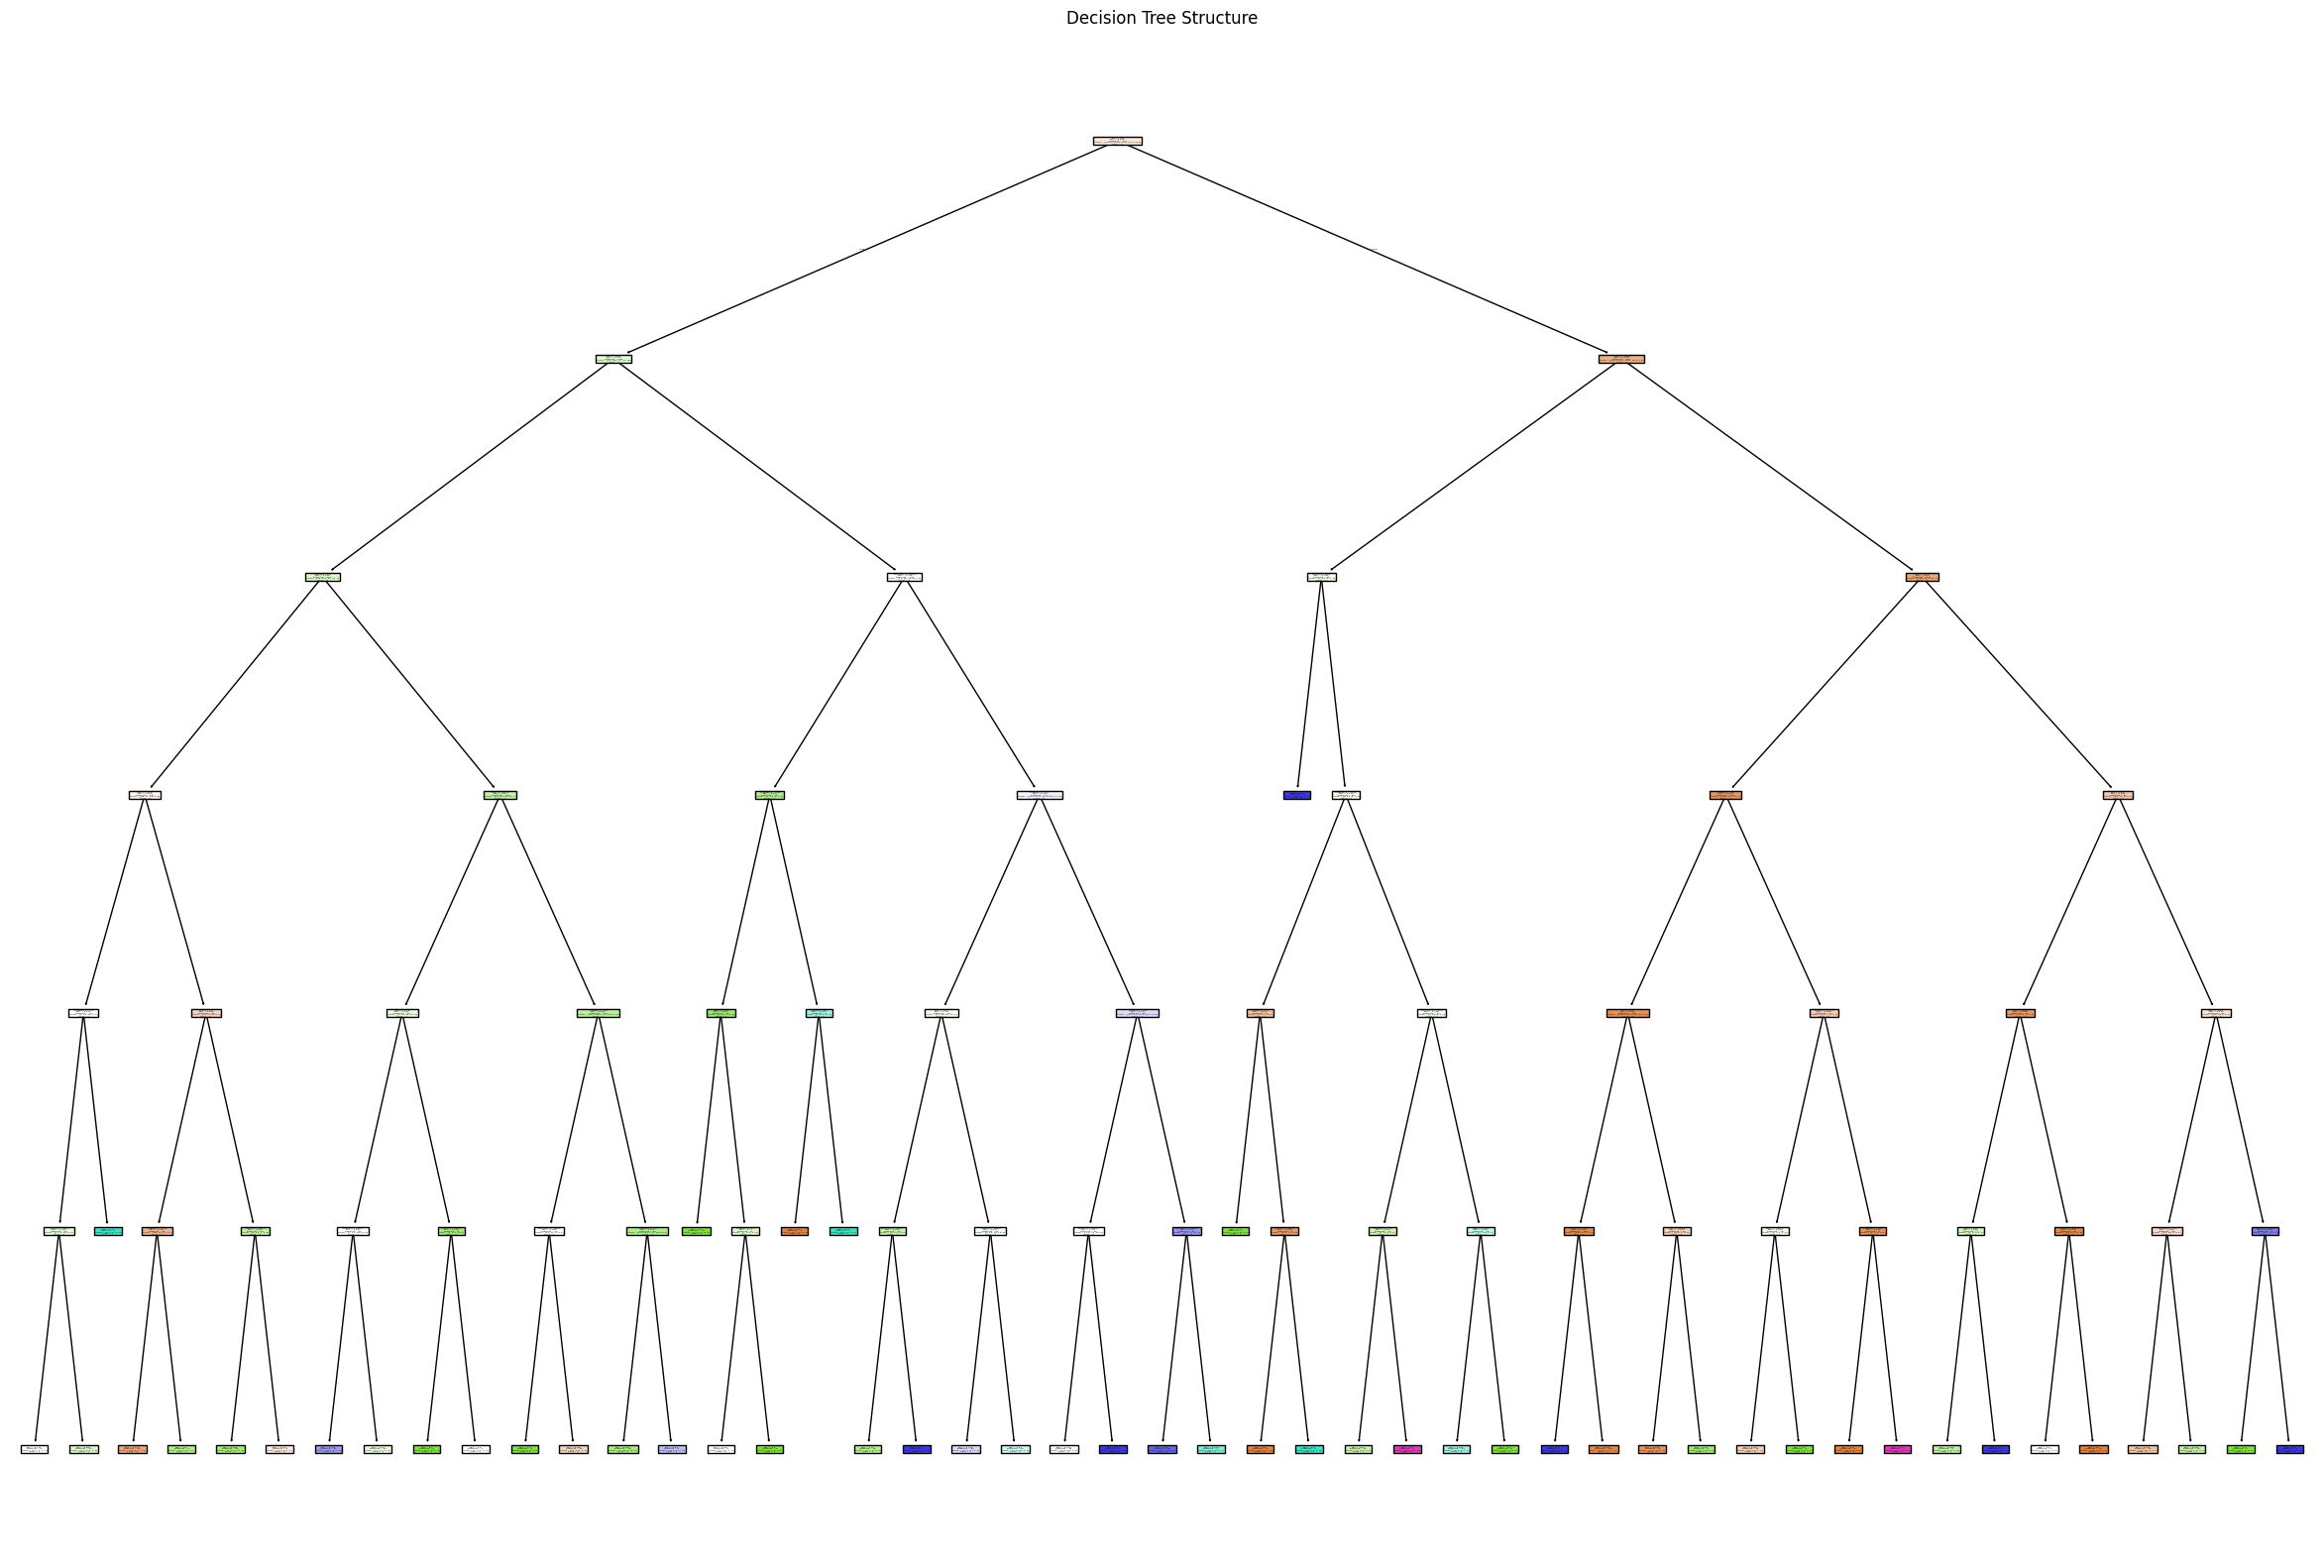

In [38]:
plt.figure(figsize=(30, 20))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in sorted(y.unique())])
plt.title("Decision Tree Structure")
plt.show()

### 🔍 Feature Importances

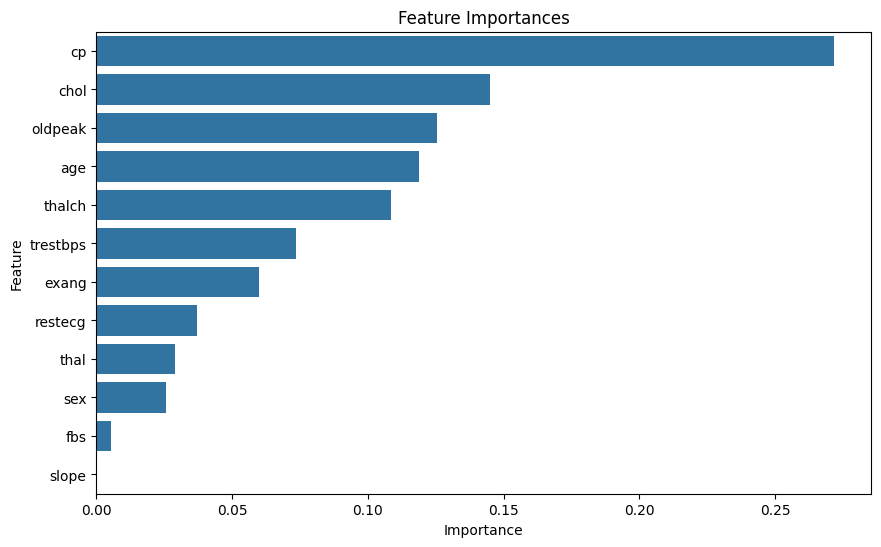

In [44]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

model = best_clf
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importances")
plt.show()


### ✅ Confusion Matrix

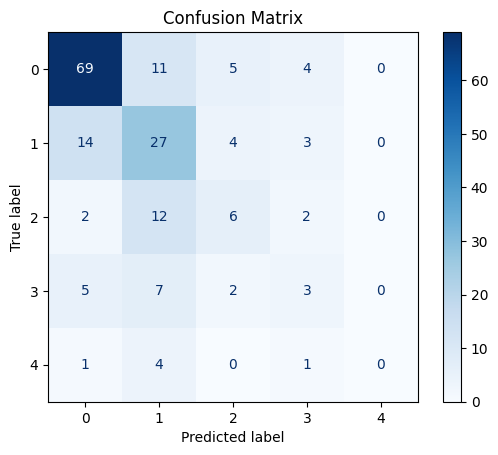

In [45]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


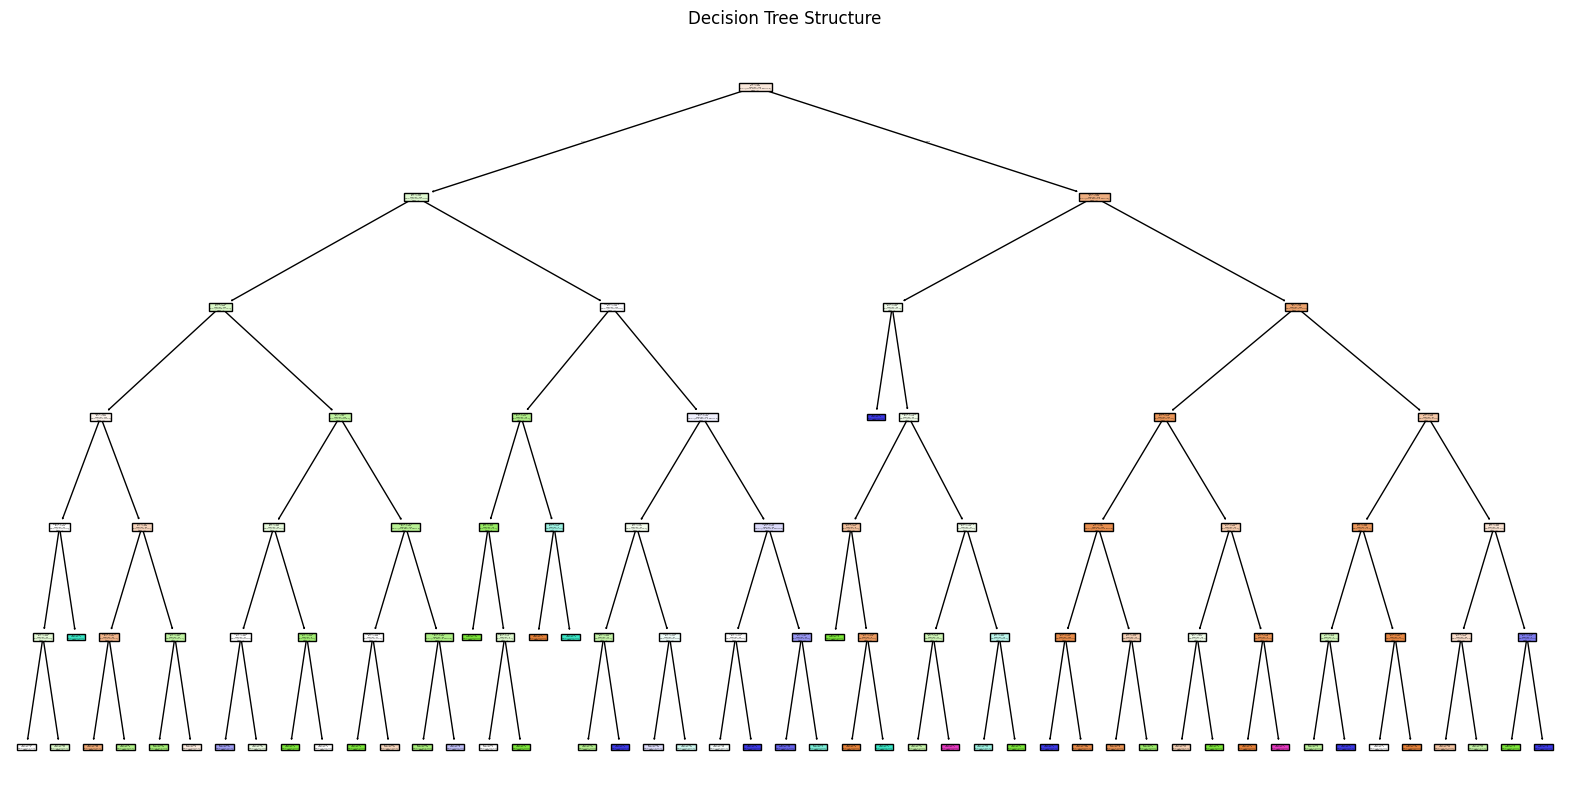

In [41]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in sorted(y.unique())])
plt.title("Decision Tree Structure")
plt.show()